# Descriptor de HOG(Histogram of Oriented Gradients)

## importar librerías necesarias

In [4]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import random
from SRC.hog import HOG

## Variables de entorno

In [5]:


carpeta_preprocesadas = 'data/preprocesadas/'
train_normal =carpeta_preprocesadas+'train/NORMAL/'
train_pneumonia =carpeta_preprocesadas+'train/PNEUMONIA/'
test_normal =carpeta_preprocesadas+'test/NORMAL/'
test_pneumonia =carpeta_preprocesadas+'test/PNEUMONIA/'
val_normal =carpeta_preprocesadas+'val/NORMAL/'
val_pneumonia =carpeta_preprocesadas+'val/PNEUMONIA/'
dir_train =carpeta_preprocesadas+'train/'
dir_test =carpeta_preprocesadas+'test/'
dir_val =carpeta_preprocesadas+'val/'
salida_caracteristicas = 'data/caracteristicas/'

## Muestra aleatoria de las imágenes preprocesadas

Se tomara aleatoriamente 3 imagenes por clase del conjunto train


### Seleccion aleatoria de imágenes

In [6]:
#display 2x3 con 3 imagenes al azar de nuemonia y 3 de normal del set de train

# Seleccionar 3 imágenes al azar de cada categoría  
normal_images = os.listdir(train_normal)
neumonia_images = os.listdir(train_pneumonia)
random_normal_images = random.sample(normal_images, 3)
random_neumonia_images = random.sample(neumonia_images, 3)

cell_size = (8, 8)
block_size = (16, 16)
block_stride = (8, 8)
num_bins = 9





### cargar y mostrar imágenes aleatoriamente seleccionadas

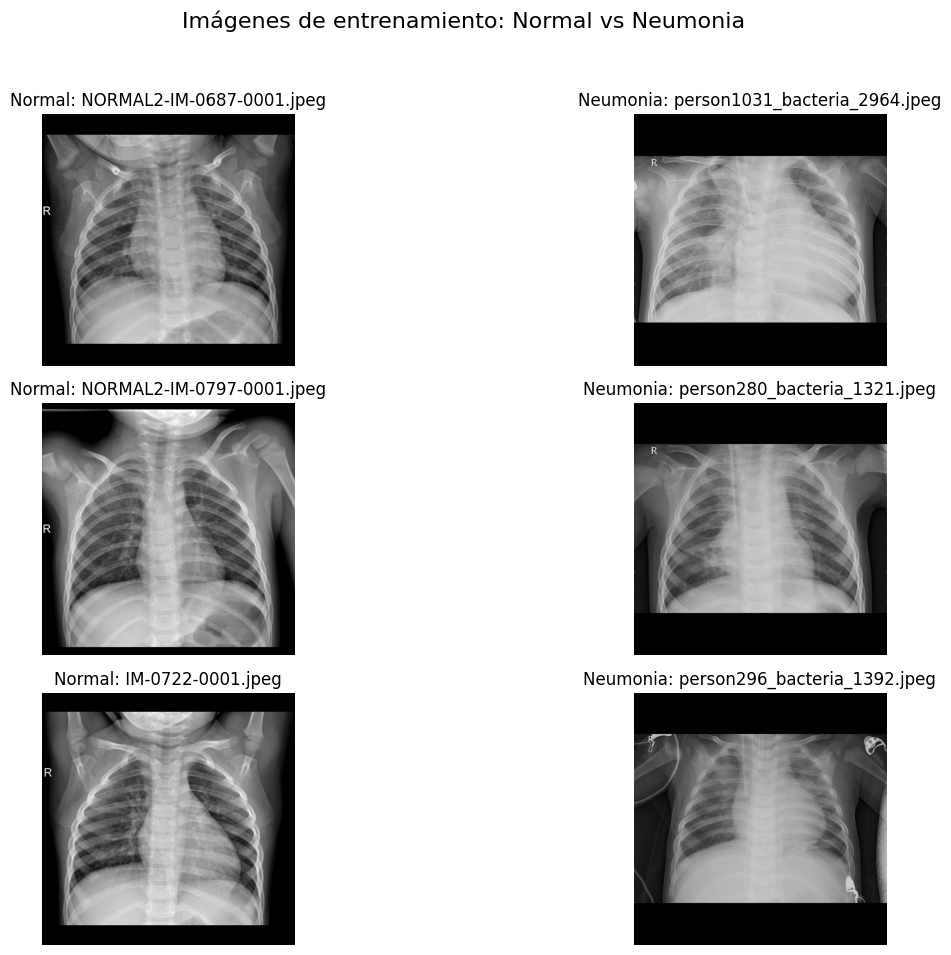

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
images = []
for i in range(3):
    # Imagen normal
    img_normal = plt.imread(os.path.join(train_normal, random_normal_images[i]))
    images.append(img_normal)
    axes[i, 0].imshow(img_normal, cmap='gray')
    axes[i, 0].set_title(f'Normal: {random_normal_images[i]}')
    axes[i, 0].axis('off')
    
    # Imagen con neumonia
    img_neumonia = plt.imread(os.path.join(train_pneumonia, random_neumonia_images[i]))
    images.append(img_neumonia)
    axes[i, 1].imshow(img_neumonia, cmap='gray')
    axes[i, 1].set_title(f'Neumonia: {random_neumonia_images[i]}')
    axes[i, 1].axis('off')
    
plt.suptitle('Imágenes de entrenamiento: Normal vs Neumonia', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


tamaño imagen normal: (512, 512)
tamaño imagen normal: (512, 512)
tamaño imagen normal: (512, 512)
tamaño imagen neumonía: (512, 512)
tamaño imagen neumonía: (512, 512)
tamaño imagen neumonía: (512, 512)


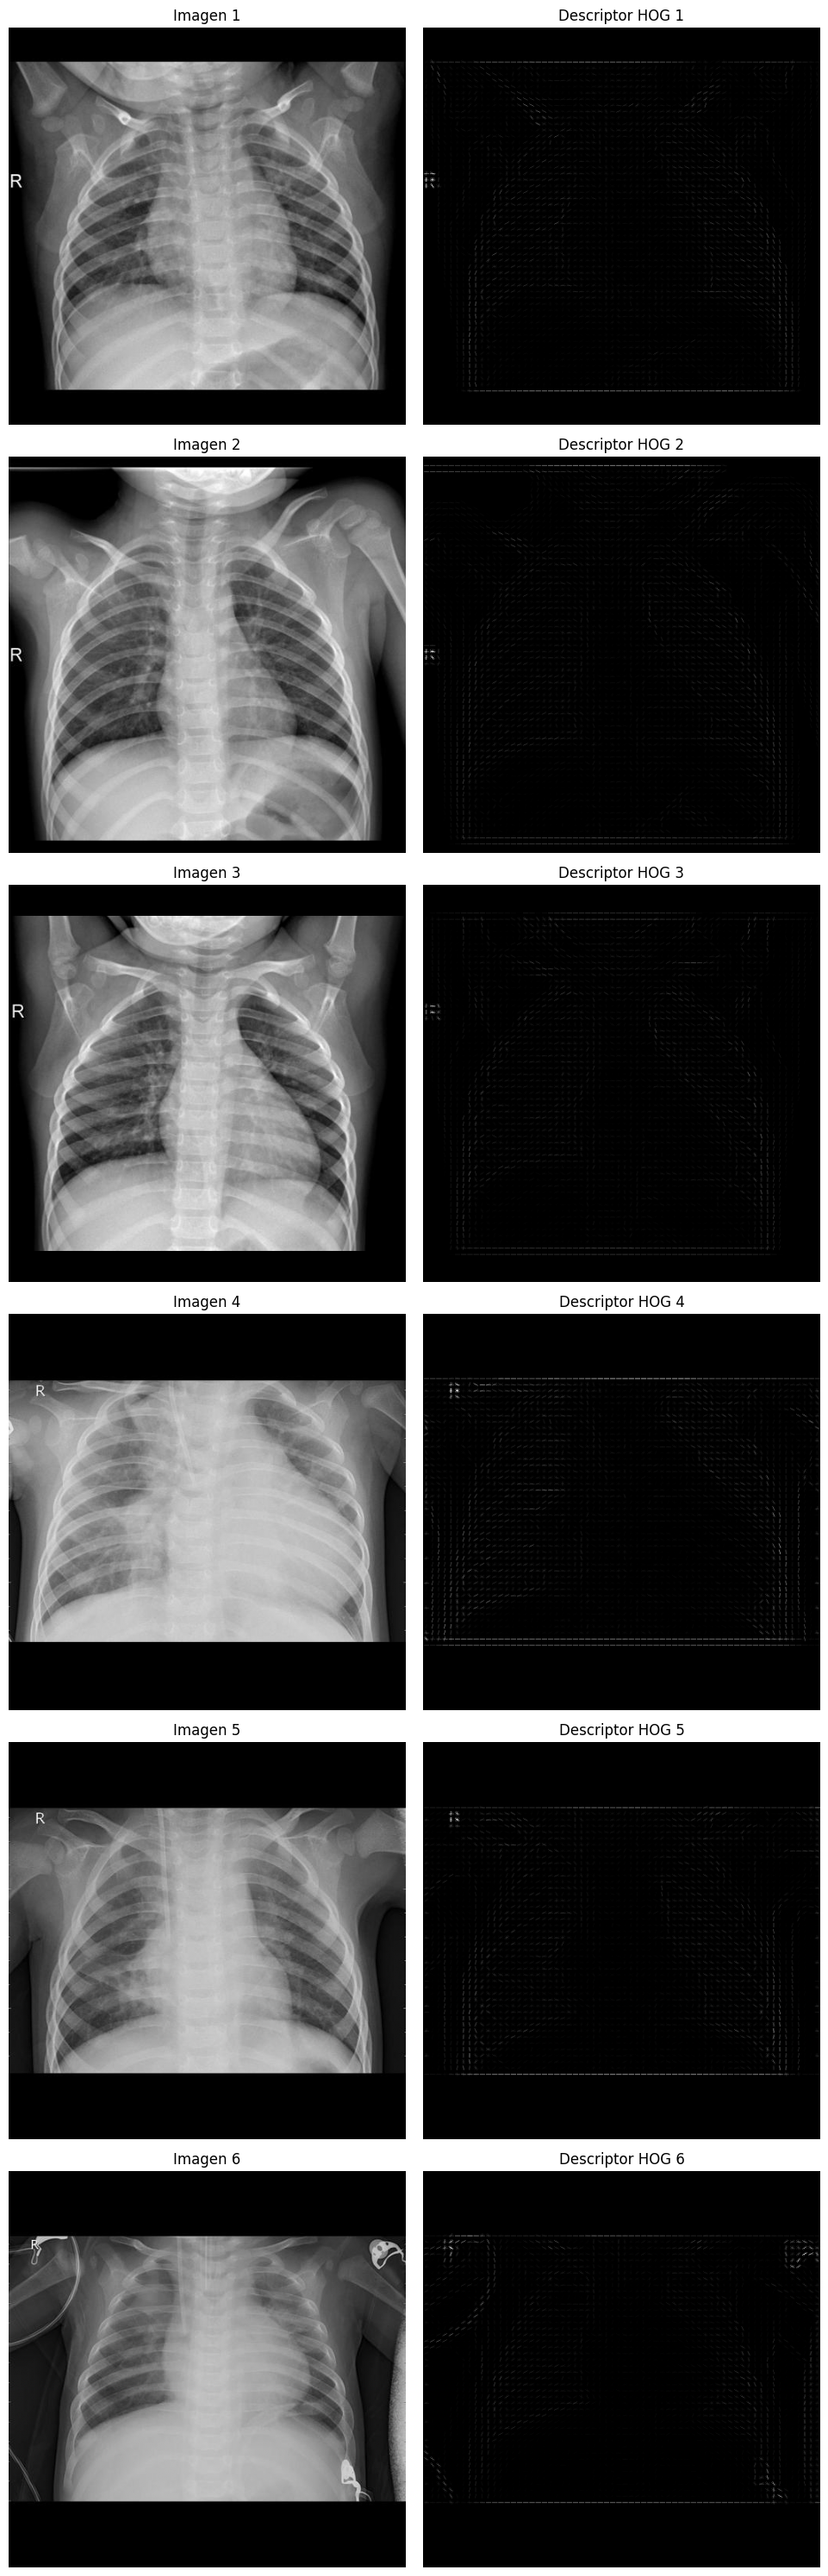

In [36]:
import random
import matplotlib.pyplot as plt
from skimage.feature import hog

# Obtener el conjunto de datos de entrenamiento como un iterable de Python y convertirlas a escala de grises
dataset = []
for img in random_normal_images:
    imagen = cv2.imread(os.path.join(train_normal, img))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    print('tamaño imagen normal:', imagen.shape)
    dataset.append(imagen)
for img in random_neumonia_images:
    imagen = cv2.imread(os.path.join(train_pneumonia, img))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    print('tamaño imagen neumonía:', imagen.shape)
    dataset.append(imagen)

# Crear la figura con 2 columnas (una para la imagen y otra para el descriptor)
num_images = len(dataset)
fig, axes = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))

for i, imagen in enumerate(dataset):
    # Mostrar la imagen original
    axes[i, 0].imshow(imagen, cmap='gray')
    axes[i, 0].set_title(f'Imagen {i + 1}')
    axes[i, 0].axis('off')

    # Verificar y ajustar las dimensiones de la imagen
    height, width = imagen.shape
    if height < 64 or width < 64:
        print(f"Imagen demasiado pequeña para HOG: {imagen.shape}")
        axes[i, 1].axis('off')  # Desactivar el eje del descriptor si no se puede calcular
        continue

    # Calcular el descriptor HOG y la imagen visualizada
    try:
        hog_features, hog_image = hog(
            imagen,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=True,
            channel_axis=None
        )
    except Exception as e:
        print(f"Error al calcular HOG: {e}")
        axes[i, 1].axis('off')  # Desactivar el eje del descriptor si hay un error
        continue

    # Mostrar el descriptor HOG visualizado
    axes[i, 1].imshow(hog_image, cmap='gray')
    axes[i, 1].set_title(f'Descriptor HOG {i + 1}')
    axes[i, 1].axis('off')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

## Bibliografía

- https://medium.com/@dnemutlu/hog-feature-descriptor-263313c3b40d